In [1]:
def exponential_smoothing(data, alpha):
    # Initialize the forecast with the first data point
    forecast = [data[0]]

    # Perform exponential smoothing for the rest of the data
    for t in range(1, len(data)):
        forecast_t = alpha * data[t] + (1 - alpha) * forecast[t - 1]
        forecast.append(forecast_t)

    return forecast

In [41]:
# Example usage
historical_data = [100, 110, 120, 130, 140]
smoothing_alpha = 0.5

In [42]:
forecasted_values = exponential_smoothing(historical_data, smoothing_alpha)

In [43]:
for t, forecast in enumerate(forecasted_values):
    print(f"Month {t + 1} Forecast: {forecast:.2f}")

Month 1 Forecast: 100.00
Month 2 Forecast: 105.00
Month 3 Forecast: 112.50
Month 4 Forecast: 121.25
Month 5 Forecast: 130.62


#### using sktime

In [30]:
from sktime.datasets import load_airline
from sktime.forecasting.exp_smoothing import ExponentialSmoothing


In [31]:
y = load_airline()

In [32]:
y

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

<Axes: xlabel='Period'>

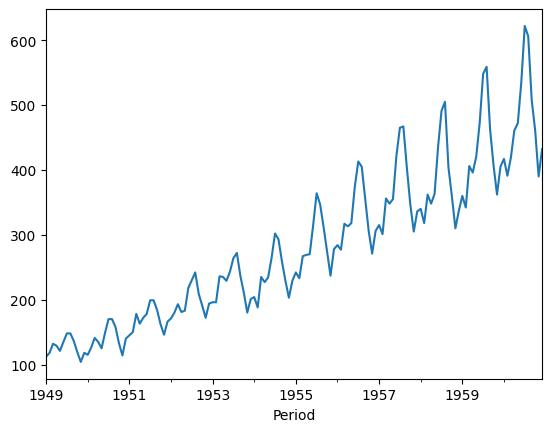

In [33]:
y.plot()

In [35]:
# Create an ExponentialSmoothing instance
model = ExponentialSmoothing(trend="add", seasonal="add", sp=12)

# Fit the model to the data
model.fit(y)


ExponentialSmoothing(seasonal='add', sp=12, trend='add')

In [36]:
fh = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [37]:
y_pred = model.predict(fh)

In [38]:
y_pred

1961-01    451.577073
1961-02    427.257748
1961-03    464.699360
1961-04    500.103185
1961-05    508.660794
1961-06    567.713873
1961-07    647.897121
1961-08    632.460961
1961-09    534.374265
1961-10    484.930880
1961-11    418.459518
1961-12    471.058935
Freq: M, Name: Number of airline passengers, dtype: float64

<Axes: >

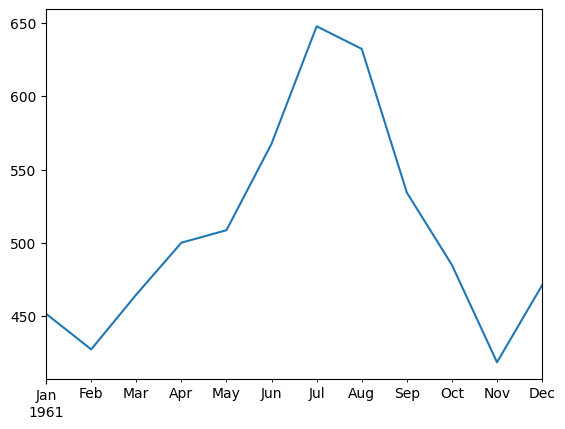

In [40]:
y_pred.plot()